# Lecture12 画像処理

matplotlibで指定可能な色

In [ ]:
import matplotlib
matplotlib.colors.cnames

FLAG_fig=False

## 16 進数のカラーコードで指定
#ff0000 (赤), #000000 (黒) のような、HTML や CSS で用いられる 16 進数で指定することもできます

<BarContainer object of 8 artists>

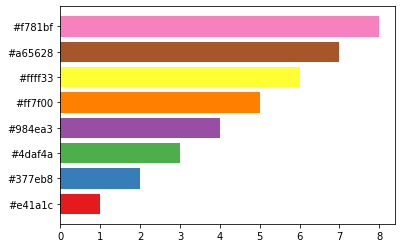

In [8]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
fig.patch.set_facecolor('white')
 
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
x = np.arange(1, 9)
height = np.arange(1, 9)
plt.barh(x, height, color=colorlist, tick_label=colorlist, align="center")



## RGB で指定
RGB それぞれのを色の要素を 0.0 ～ 1.0 のタプルで指定することも可能です。

<BarContainer object of 4 artists>

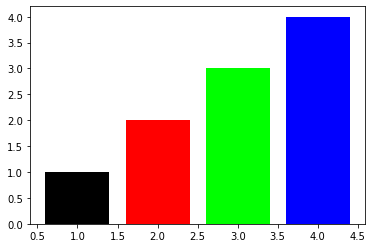

In [9]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
fig.patch.set_facecolor('white')
 
col1 = [0.0, 0.0, 0.0]
col2 = [1.0, 0.0, 0.0]
col3 = [0.0, 1.0, 0.0]
col4 = [0.0, 0.0, 1.0]
colorlist = [col1, col2, col3, col4]
 
x = np.arange(1, 5)
height = np.arange(1, 5)
#plt.bar(x, height, color=colorlist, tick_label=colorlist, align="center")
plt.bar(x, height, color=colorlist,  align="center")

### グレースケールで指定
‘0.0’ (黒) ～ ‘1.0’ (白) のグレースケールで指定することもできます。作成した資料を白黒印刷する場合に便利です

([<matplotlib.patches.Wedge at 0x1dc18f466d0>,
 [Text(0.33991869870988073, 1.0461621663333946, '0.1'),
  Text(0.8899187028927925, 0.6465637650236903, '0.2'),
  Text(1.0999999999999999, -2.574735819510201e-08, '0.3'),
  Text(0.8899186726249574, -0.6465638066837907, '0.4'),
  Text(0.33991864973549485, -1.0461621822461364, '0.5'),
  Text(-0.3399187476842659, -1.0461621504206509, '0.6'),
  Text(-0.8899187331606259, -0.6465637233635886, '0.7'),
  Text(-1.0999999999999974, 7.724207464605884e-08, '0.8'),
  Text(-0.8899186423571203, 0.6465638483438895, '0.9'),
  Text(-0.3399186007611086, 1.0461621981588756, '1.0')])

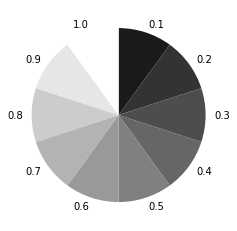

In [11]:
import matplotlib.pyplot as plt
 
x = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
colorlist = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
plt.pie(x, labels=colorlist, counterclock=False, startangle=90, colors=colorlist)

## Scikit-Imageによる画像入力

In [ ]:
! pip install scikit-image

In [ ]:
from skimage import data, io, filters, color, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = io.imread("data/baboon.jpg")

In [ ]:
img.shape #読み込んだinstance画像のサイズ（タテ・ヨコ・次元）を確認 (次元：RGB画像なので，3次元)

In [ ]:
img #読み込んだインスタンスについて，データ表示

表示

In [ ]:
io.imshow(img)

グレイ変換

In [ ]:
imgGray = color.rgb2gray(img)
imgGray = img_as_ubyte(imgGray)
io.imshow(imgGray)
imgGray

統計量

In [ ]:
#print('pixel num', np.count(img_yiq[:, :, 0]))
print('pixel sum', np.sum(imgGray[:, :]))
print('pixel mean', np.mean(imgGray[:,:]))
print('pixel variance', np.var(imgGray[:,:]))
print('pixel stddev', np.std(imgGray[:,:]))

ヒストグラムを表示

In [ ]:
hists, bins=np.histogram(imgGray, 255, [0, 255])

In [ ]:
plt.plot(hists)

ネガポジ反転

In [ ]:
ImNega = 255 - imgGray # ネガポジはこれだけ
plt.imshow(ImNega)
plt.gray()

２値化

In [ ]:
height,width= imgGray.shape
ret = filters.threshold_otsu(imgGray) #しきい値を自動で判別
imgBinary = np.zeros((height, width))
imgBinary = imgGray > ret #しきい値にもとづいて，2値化処理実行
ret

In [ ]:
plt.imshow(imgBinary)

## OpenCV

https://tellusxdp.github.io/start-python-with-tellus/lesson8.html

とかみている

 pip install opencv-python

In [ ]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

画像ファイルを読んで表示します。

In [ ]:
img_org = cv2.imread('data/lena_std.tif') # オリジナル画像の入力

plt.imshow(img_org)

OpenCVでimreadを使って読み込む場合、既定では、画像を「BGR」（青・緑・赤）の順の配列として読み込みます。対して、表示するためのmatplotlib.imshow()では、画像が「RGB」（赤・緑・青）の順の配列として構成されていることを前提としています。そのため、このまま表示すると、青と赤が入れ替わってしまうため、先に表示したように色がおかしくなってしまうのです。

In [ ]:
# BGRの画像をRGBに変換
rgb_img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img_org)

In [ ]:
img_org = cv2.imread('data/lec12_sample.png') # オリジナル画像の入力
rgb_img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,8))
plt.imshow(rgb_img_org)

In [ ]:
# グレースケール変換
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,8))
plt.imshow( img_gray, cmap='gray')

In [ ]:
#平均値フィルタ

kernel_mean_3x3 = np.array([
                            [1/9,  1/9, 1/9],
                            [1/9,  1/9, 1/9],
                            [1/9,  1/9, 1/9]
                            ], np.float32)
img_mean_3x3 = cv2.filter2D(img_gray, -1, kernel_mean_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_mean_3x3, cmap='gray')

In [ ]:
# ラプラシアン フィルタ（３×３）
kernel_laplacian_3x3 = np.array([
                            [1,  1, 1],
                            [1, -8, 1],
                            [1,  1, 1]
                            ], np.float32)
img_laplacian_3x3 = cv2.filter2D(img_gray, -1, kernel_laplacian_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_laplacian_3x3, cmap='gray')

In [ ]:
# 鮮鋭化 フィルタ（３×３）
kernel_sharp_3x3 = np.array([
                            [0,  -1, 0],
                            [-1, 5, -1],
                            [0,  -1, 0]
                            ], np.float32)
img_sharp_3x3 = cv2.filter2D(img_gray, -1, kernel_sharp_3x3)
plt.figure(figsize = (10,8))
plt.imshow( img_sharp_3x3, cmap='gray')

In [ ]:
# ガウシアン フィルタ
kernel_gaussian = np.array([
                            [1,  2, 1],
                            [2,  4, 2],
                            [1,  2, 1]
                            ], np.float32) / 16
img_gaussian = cv2.filter2D(img_gray, -1, kernel_gaussian)
plt.figure(figsize = (10,8))
plt.imshow( img_gaussian, cmap='gray')

In [ ]:
#エッジ抽出
#edge_sob_x = cv2.Sobel(img_gray,cv2.CV_32F,1,0,ksize=5)
kernel_gaussian = np.array([
                            [1,  0, -1],
                            [2,  0, -2],
                            [1,  0, -1]
                            ], np.float32) / 16
img_gaussian = cv2.filter2D(img_gray, -1, kernel_gaussian)
plt.figure(figsize = (10,8))
plt.imshow(edge_sob_x, cmap='gray')

## GrayScale
matplotlibの既定のカラーマップ設定によるものです。既定では、グレースケール画像の場合、色味が暗いほど青く、明るくなるにつれて 青 → 緑 → 黄色 の色味で表示されるという設定になっています。

そのため、JupyterLabで正しく 黒 → グレー → 白 の色味でモノクロ画像を表示するには、imshow() に、黒 → グレー → 白 の色味で表示できるよう、カラーマップの設定を追加する必要があります。具体的なコードの記述方法としては、 imshow() に cmap="gray" というキーワード引数を追記します。

In [ ]:
img_gry = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # グレイスケールに変換
plt.imshow(img_gry, cmap='gray')



スレッシュホールド値をへんかさせてみます。

In [ ]:
DEFAULT_THRESH_VAL = 128 # 閾値処理のデフォルト値
MAX_VAL = 255            # 8bit 階調を表す

threshVal = 50
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')

In [ ]:
threshVal = 128
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')
if FLAG_fig: plt.savefig('IMG_GrayTh_128.png')

In [ ]:
threshVal = 164
retVal, img_bin = cv2.threshold(img_gry, threshVal, MAX_VAL, type=cv2.THRESH_BINARY)
plt.imshow(img_bin, cmap='gray')
if FLAG_fig: plt.savefig('IMG_GrayTh_164.png')

## エッジ検出

In [ ]:
img_org = cv2.imread('data/test.jpg') # オリジナル画像の入力
img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY) # グレイスケールに変換

edge_sob_x = cv2.Sobel(img,cv2.CV_32F,1,0,ksize=5)
plt.imshow(edge_sob_x, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_sob_x.png')

In [ ]:
edge_lapl = cv2.Laplacian(img, cv2.CV_32F) 
plt.imshow(edge_lapl, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_lapl.png')

In [ ]:
edge_cann = cv2.Canny(img, 80, 120)
plt.imshow(edge_cann, cmap='gray')
if FLAG_fig: plt.savefig('IMG_edge_cann.png')

## 周波数フィルタリング

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('data/baboon.jpg',0)

dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

isize=10 # マスクの半分のサイズ

# ローパスフィルタ用マスクの作成，中心正方領域は1，それ以外は0
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-isize:crow+isize, ccol-isize:ccol+isize] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back1 = cv2.idft(f_ishift)
img_back1 = cv2.magnitude(img_back1[:,:,0],img_back1[:,:,1])

# ハイパスフィルタ用マスクの作成，中心正方領域は0，それ以外は1
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-isize:crow+isize, ccol-isize:ccol+isize] = 0
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back2 = cv2.idft(f_ishift)
img_back2 = cv2.magnitude(img_back2[:,:,0],img_back2[:,:,1])


fig, ((axLU, axRU), (axLL, axRL)) = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

axLU.imshow(img, cmap = 'gray')
axLU.set_title('Input image'),
axLU.set_xticks([]), axLU.set_yticks([]) # Remove ticks

axRU.imshow(magnitude_spectrum, cmap = 'gray')
axRU.set_title('Magnitude Spectrum')
axRU.set_xticks([])
axRU.set_yticks([])

axLL.imshow(img_back1, cmap = 'gray')
axLL.set_title('Inverse FFT with Lowpass '),
axLL.set_xticks([])
axLL.set_yticks([]) # Remove ticks

axRL.imshow(img_back2, cmap = 'gray')
axRL.set_title('Inverse FFT with Highpass')
axRL.set_xticks([])
axRL.set_yticks([])
if FLAG_fig: plt.savefig('IMG_DFT.png')
plt.show()


## 特徴点抽出

In [ ]:
import cv2
import sys

# Haar-like特徴分類器の読み込み
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')

# 顔データの読込み
img = cv2.imread('data/face.png')

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔を検知
faces = face_cascade.detectMultiScale(gray)

In [ ]:
for (x,y,w,h) in faces:
    # 検知した顔を矩形で囲む
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 顔画像（グレースケール）
    roi_gray = gray[y:y+h, x:x+w]
    # 顔画像（カラースケール）
    roi_color = img[y:y+h, x:x+w]
    # 顔の中から目を検知
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        # 検知した目を矩形で囲む
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [ ]:
# 画像表示
plt.imshow(img, cmap='gray')

### コーナー検出

In [ ]:
img_org = cv2.imread('data/lec12_sample.png') # オリジナル画像の入力
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)

#コーナーの検出
corners = cv2.cornerHarris(img_gray, 3,1,0.04)
plt.imshow(corners, cmap='gray')

### SHIFT特徴量

は、特許権利関連で、使えない(2022に特許が切れるといううわさもある）


In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)
img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=4)
plt.imshow(img_sift, cmap='gray')

In [ ]:
print(cv2.__version__)

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_org = cv2.imread('data/lec12_sample.png') # オリジナル画像の入力
img_gray = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create ()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)
img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=4)
plt.imshow(img_sift, cmap='gray')

### Hough変換で直線を見つける


In [ ]:
# Canny 法で2値化する。
edges = cv2.Canny(img_gray, 150, 300, L2gradient=True)
plt.imshow(edges, cmap='gray')

In [ ]:
# ハフ変換で直線検出する。
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
print(lines)

In [ ]:
def draw_line(img, theta, rho):
    h, w = img.shape[:2]
    if np.isclose(np.sin(theta), 0):
        x1, y1 = rho, 0
        x2, y2 = rho, h
    else:
        calc_y = lambda x: rho / np.sin(theta) - x * np.cos(theta) / np.sin(theta)
        x1, y1 = 0, calc_y(0)
        x2, y2 = w, calc_y(w)

    # float -> int
    x1, y1, x2, y2 = list(map(int, [x1, y1, x2, y2]))

    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 2,)


# 直線を描画する。
if lines is not None:
    for rho, theta in lines.squeeze(axis=1):
        draw_line(img_gray, theta, rho)
plt.imshow(img_gray)

## KNNによる領域分割

In [ ]:
from skimage import data,io,color, img_as_ubyte
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#img_org = cv2.imread('data/lena_std.tif') # オリジナル画像の入力
img = io.imread('data/lena_std.tif')
imgG = color.rgb2gray(img) # rangeが0-1にしかなりません
imgG = img_as_ubyte(imgG)  # なので，0-255に値を変更します

In [ ]:
ClsNum = 4
vec=imgG.reshape(-1, 1).astype(float)
VecCls = np.zeros((img.shape[0]*img.shape[1]))
modelGray = KMeans(n_clusters = ClsNum).fit(vec)

ClsGraypred = modelGray.predict(vec)
clsLabel = modelGray.labels_

In [ ]:
modelGray.cluster_centers_

In [ ]:
for k in range(ClsNum):
    VecCls[ClsGraypred == k]= modelGray.cluster_centers_[k]

imgCls =VecCls.astype(np.uint8).reshape(512, 512)

In [ ]:
imgKCls = np.zeros((img.shape[0], img.shape[1], ClsNum))
tmp = ClsGraypred.reshape(img.shape[0], img.shape[1])

for k in range(ClsNum):
    t = np.zeros((img.shape[0], img.shape[1]))
    i, j = np.where(tmp == k) # 各クラスの領域を示す画素を求める
    t[i,j] = 255                # 得られた画素の情報に対し，対象領域として画素値を与える 
    imgKCls[:,:,k] = t          # 対象領域画像へ分類

In [ ]:
plt.subplot(221), plt.imshow(imgKCls[:,:,0])
plt.title('Region 1'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(imgKCls[:,:,1])
plt.title('Region 2'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(imgKCls[:,:,2])
plt.title('Region 3'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(imgKCls[:,:,3])
plt.title('Region 4'), plt.xticks([]), plt.yticks([])

## YOLOによる物体認識

オープンソースのCNNであるdarkentをcloneして、ビルドします。

In [ ]:
%%bash
git clone https://github.com/pjreddie/darknet
cd darknet
make

YOLOv3のweightをダウンロードします。

In [ ]:
%%bash
cd ./darknet
wget https://pjreddie.com/media/files/yolov3.weights

サンプルで入っている画像（giraffe.jpg）に物体検知をかけます

In [ ]:
%%bash
cd ./darknet/
./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg


In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('darknet/predictions.jpg'))